# Milestone 1 Phase 1

# Introduction
**Delfi Kusuma Wardhani**

H8 FTDS-002

# Dataset Description
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## Attribute Information
### Input variables:
*bank client data*
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')

*related with the last contact of the current campaign:*
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). **Important note**: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

*other attributes:*
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes','no')

# Objective
One of the Portuguese Bank Institution has their own product (bank term deposit) designated for their clients, looking forward for them to be interested and are willing to subscribe this product, so the bank will could gain the profit by turning over the money.

In order to attract clients, the bank does the marketing campaign. The marketing campaigns were based on phone calls (telemarketing). The bank must seek for clients with certain criteria so that they can determine clients who have the potential to be interested in subscribing to their products.

In this analysis project, we will **analyze the given dataset** then we **select some of the features** to be trained with several **machine learning models**. All models then will be evaluated and we could select the best model that generate prediction with highest accuracy score. This model then can help the bank to predict the potential client to subscribe their deposit term product.


# Import Library

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Load Data & EDA
import pandas as pd 
import numpy as np
import os
import urllib.request
import tarfile

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Training Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# Data Loading

In [2]:
# Download Dataset
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/delfikw94/Dataset/main/"
BANK_PATH = os.path.join("bank")
BANK_URL = DOWNLOAD_ROOT + "bank/bank.tgz"

# Fetching function
def fetch_bank_data(bank_url=BANK_URL, bank_path=BANK_PATH):
    if not os.path.isdir(bank_path):
        os.makedirs(bank_path)
    tgz_path = os.path.join(bank_path, "bank.tgz")
    urllib.request.urlretrieve(bank_url, tgz_path)
    bank_tgz = tarfile.open(tgz_path)
    bank_tgz.extractall(path=bank_path)
    bank_tgz.close()

In [3]:
# Fetch to the directory
fetch_bank_data() 

In [4]:
# Function for loading the dataset
def load_bank_data(bank_path=BANK_PATH):
    csv_path = os.path.join(bank_path, "bank.csv")
    return pd.read_csv(csv_path)

# Load the data and copy to other variables 
data = load_bank_data()
df = data.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
# Show dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


# Data Cleaning

Checking if there's any missing value and duplicated data

In [6]:
# Show the sum of missing value and duplicated data
print('Missing value :','\n', df.isnull().sum())
print('Duplicated data : ', df.duplicated().sum())

Missing value : 
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Duplicated data :  0


There is no missing value nor duplicated data in this dataset

# Exploratory Data Analysis (EDA)

One of Bank Institution has their own product (bank term deposit) designated for their clients, looking forward for them to be interested and are willing to subscribe this product, so the bank will could gain the profit by turning over the money.

In order to attract clients, the bank does the marketing campaign. The marketing campaigns were based on phone calls (telemarketing). The bank must seek for clients with certain criteria so that they can determine clients who have the potential to be interested in subscribing to their products.

Now, we analyse the criteria (features) that affect the clients' intention to subscribe the product. First, let's see the preview of the dataset

In [7]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


The dataset contains the personal information of the bank client (age, job, marital, education), their history recorded in last contact of the current campaign (contact, month, day, duration), and other information of their personal loan (default, housing, loan, balance).

Now, let's see the distribution of the data for each numerical data.

## Analysing Numerical Data

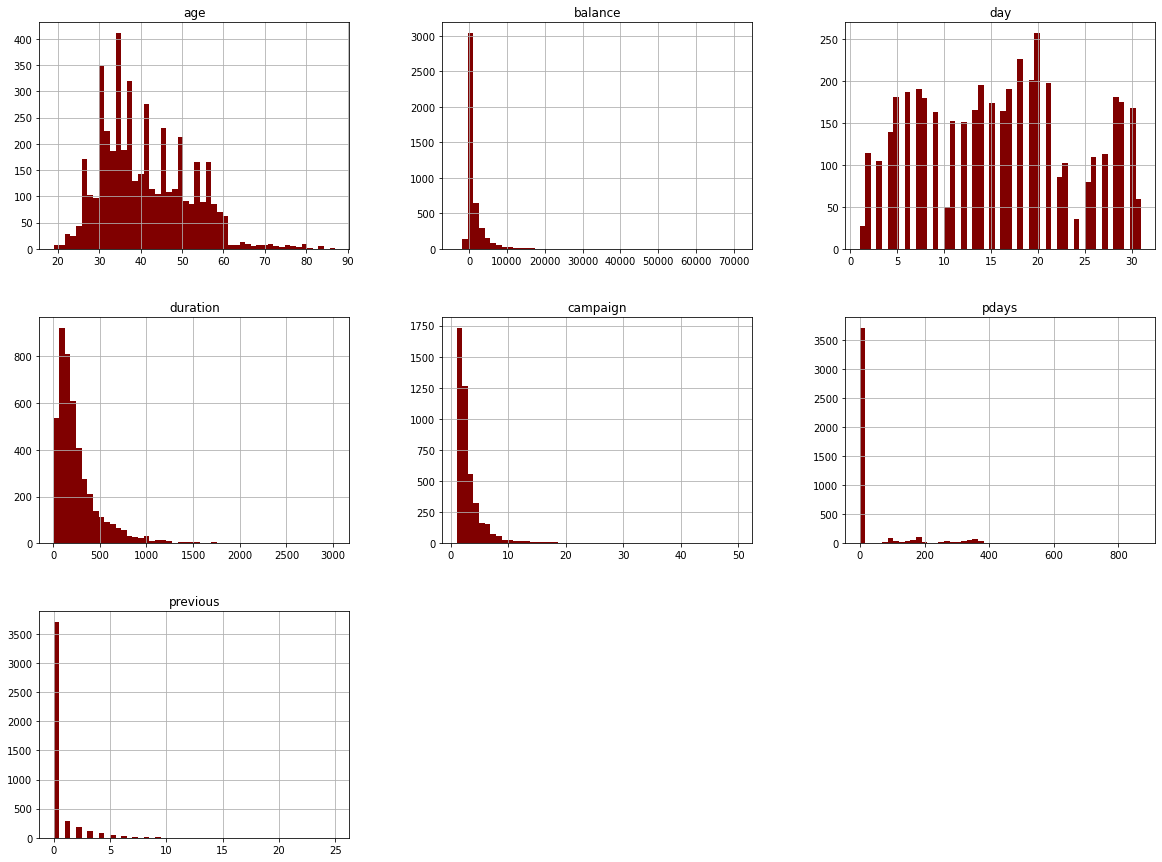

In [8]:
df.hist(bins=50, figsize=(20,15), color='maroon')
plt.show()

Histograms show us which values are more and less common along with their dispersion. From the graphs above we could see most of the data are not symmetric, most of them are right-skewed, then the mean is typically greater than the median. In this case, for further use, we should consider using the median to evaluate the center of the data, rather than the mean.

After looking at each column's data distribution, let's take a look at the correlation between them (the numerical datas). We could see the correlation between two numerical data with the scatterplot, pandas function (corr), and also heatmap correlation matrix from seaborn.

In [9]:
# Replacing 'y' value become numbers so it could be included in correlation measurement
df.replace({"y": {"no": 0, "yes": 1}}, inplace=True)

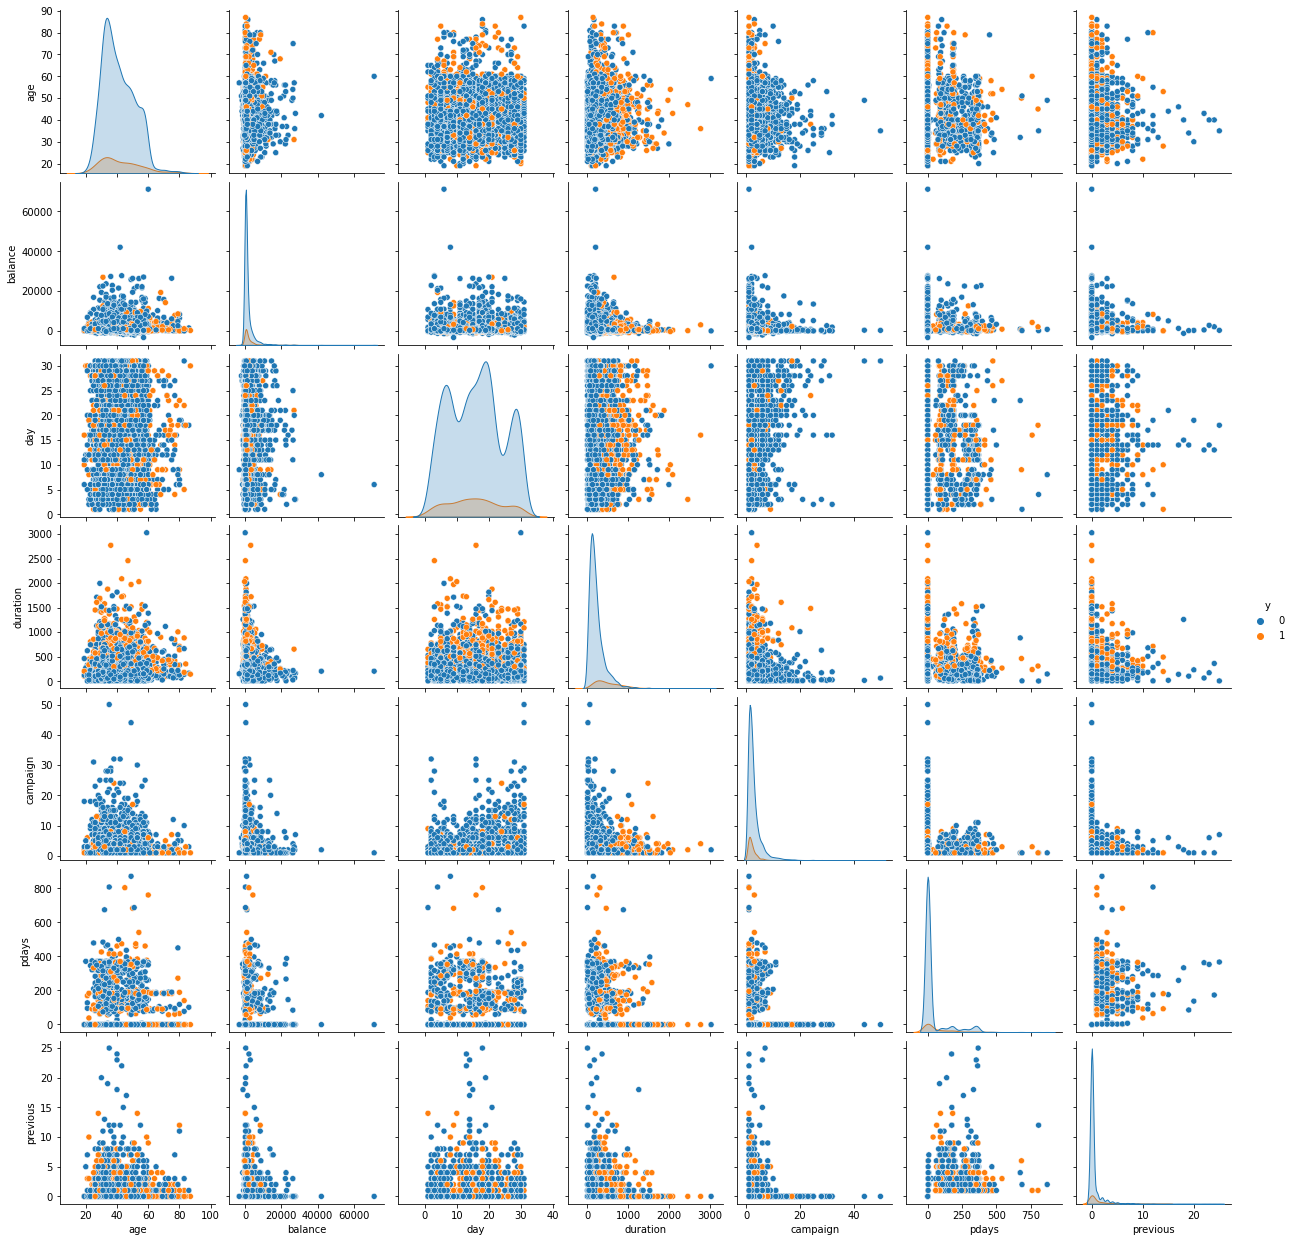

In [10]:
# Summary of scatterplot for the dataset
sns.pairplot(data=df, hue='y')

Relationships between variables can be described in many ways: positive or negative, strong or weak, linear or nonlinear. Since our target data basically is binary categorical (yes or no), so it's difficult to see the pattern in correlation with other features. Now, let's see for other ways in seeing it's correlation.

In [11]:
# Correlation value from each numerical data
df.corr()

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,0.045092
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196,0.017905
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114,-0.011244
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080,0.401118
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833,-0.061147
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562,0.104087
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000,0.116714
y,0.045092,0.017905,-0.011244,0.401118,-0.061147,0.104087,0.116714,1.000000


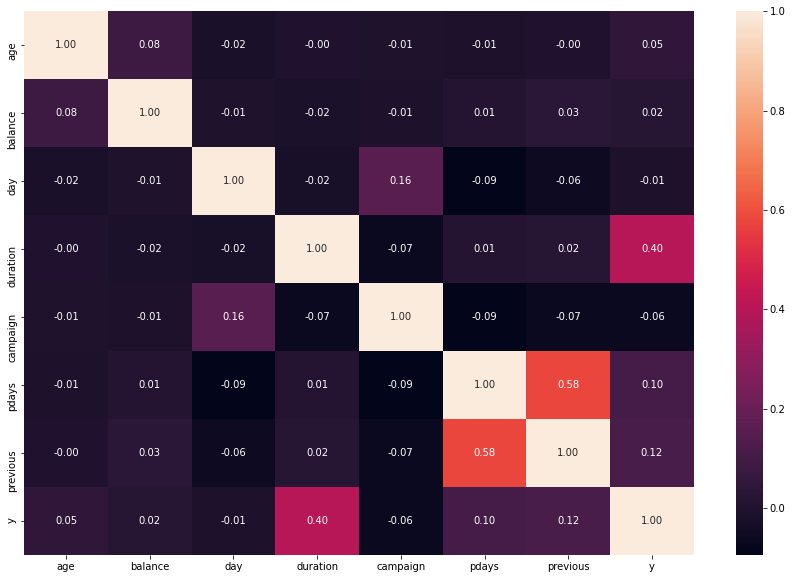

In [12]:
# Heatmap Correlation Matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

Two cells of codes above generate the correlation value between numerical datas. But we could see more clearly in heatmap chart because it gives the visualization to help us in detecting the feature that has strong correlation. From the result graph above, we could see the feature that has strong correlation with 'y' value is 'duration'. Here's the tricky part though. The **duration is not known before a call is performed. Also, after the end of the call y is obviously known.** Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## Analysing Categorical Data

We've seen the numerical features, but apparently none of them are affecting the 'y' value. Now let's take a look at the categorical data. Analysing categorical data isn't the same as analysing the numerical data. We couldn't take a loot at them as a whole dataset, instead we should take a look one by one in order to identify whether a certain feature has the strong or weak correlation with our target value. Sometimes, we also should make an assumption regarding the given data to picturing them and to be verified later.

### Job

First, let's take a look at 'job' feature. The code below will show us the graph that shows the subscription of product based on client's occupation.

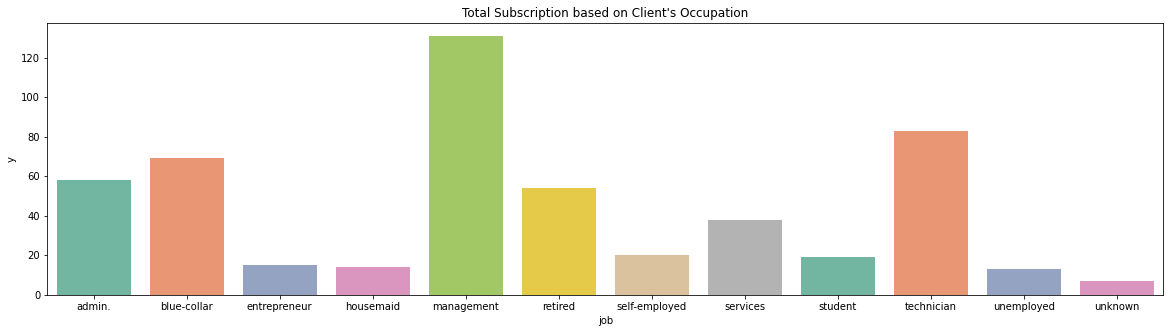

In [13]:
# Barplot with 'job' and 'y' variable
df1 = df.groupby('job')[['y']].sum().reset_index()
plt.figure(figsize=(20,5))
plt.title("Total Subscription based on Client's Occupation")
sns.barplot(data=df1, x='job', y='y', palette='Set2')
plt.show()

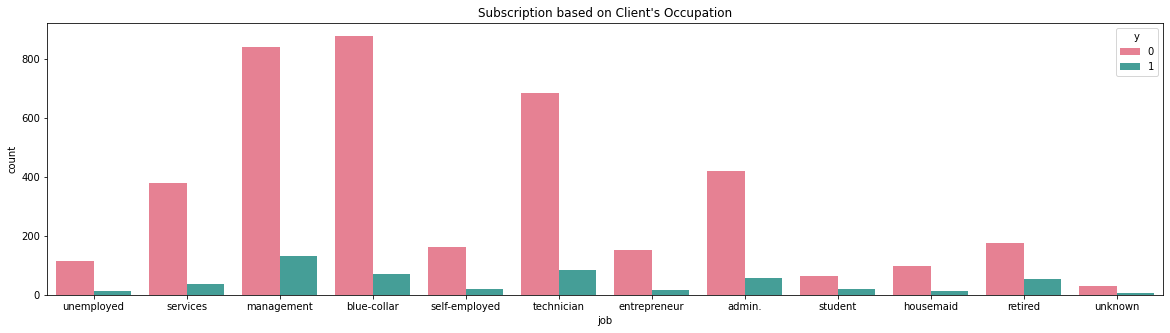

In [14]:
# Countplot to see the distinction between the 'y' values for 'job'
plt.figure(figsize=(20,5))
plt.title("Subscription based on Client's Occupation")
sns.countplot(x="job", data=df, hue="y", palette='husl')
plt.show()

The highest subscriber clients are they whose career is in management field, followed by technician, blue-collar, admin, and retiree. However, even if these job fields contribute to many subscribed clients, they also have the largest amount of rejection. But still, these jobs are the most reliable source of money (income) for the client's, so we'd want to consider this feature that has correlation with our 'y' value.

### Marital

Marriage mostly considered as other source of income for some people, like housewives or maybe househusbands. First, we can assume that married people's financial statements are more complex compared to the single ones because they live together and have more responsibilities in taking each other or maybe for the children, so they are more likely to be interested in having more financial investments (the bank's product).

In [15]:
CrosstabResult2=pd.crosstab(index=df['marital'],columns=df['y'])
CrosstabResult2

y,0,1
marital,,
divorced,451,77
married,2520,277
single,1029,167


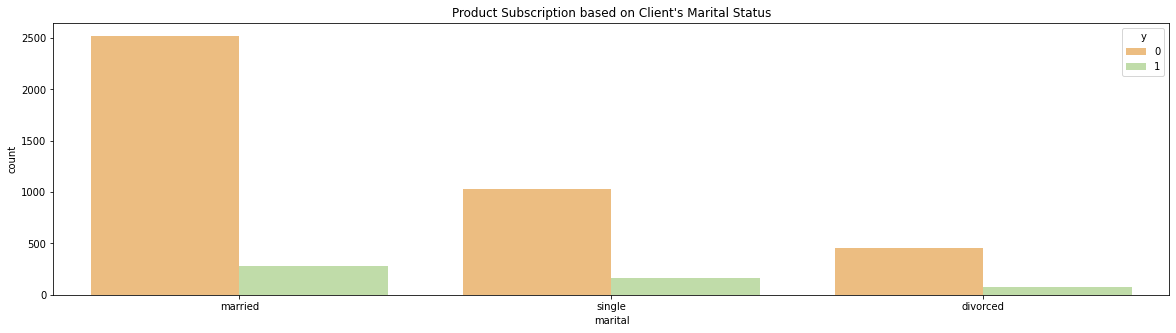

In [16]:
# Countplot to see the distinction between the 'y' values for 'job'
plt.figure(figsize=(20,5))
plt.title("Product Subscription based on Client's Marital Status")
sns.countplot(x="marital", data=df, hue="y", palette='Spectral')
plt.show()

From the chart above we could see that there's not much difference in total subscription based on marital status, especially if we consider the divorced clients as single too. From this result, we see that no value from marital status that could boost the 'y' value, so we decided not to select this feature into the model later.

### Education

The client's education levels are divided into 3, primary, secondary, tertiary, and some others did not provide their education information.

In [17]:
CrosstabResult3=pd.crosstab(index=df['education'],columns=df['y'])
CrosstabResult3

y,0,1
education,,
primary,614,64
secondary,2061,245
tertiary,1157,193
unknown,168,19


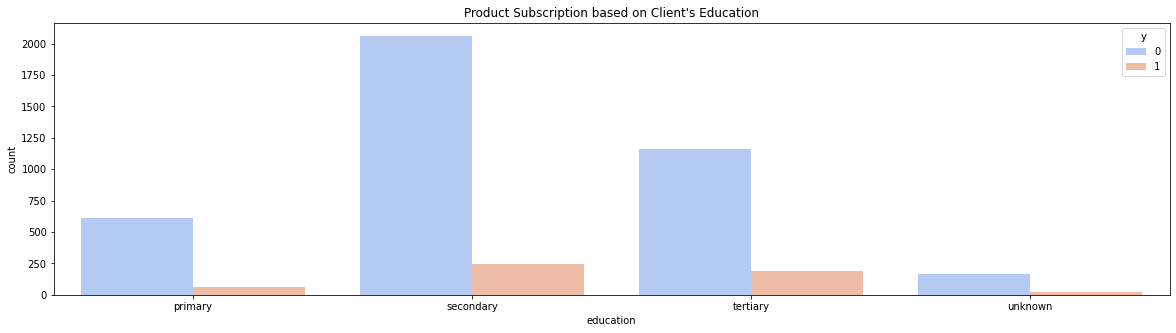

In [18]:
plt.figure(figsize=(20,5))
plt.title("Product Subscription based on Client's Education")
sns.countplot(x="education", data=df, hue="y", palette='coolwarm')
plt.show()

From the chart above we could see that clients with higher education level seem more interested in subscribing the bank's product. Assuming people with higher education level would understand the importance of financial investments.

### Contact
This is the type of communication that conducted between the marketing team and clients when explaining the product campaign.

In [19]:
CrosstabResult4=pd.crosstab(index=df['contact'],columns=df['y'])
CrosstabResult4

y,0,1
contact,,
cellular,2480,416
telephone,257,44
unknown,1263,61


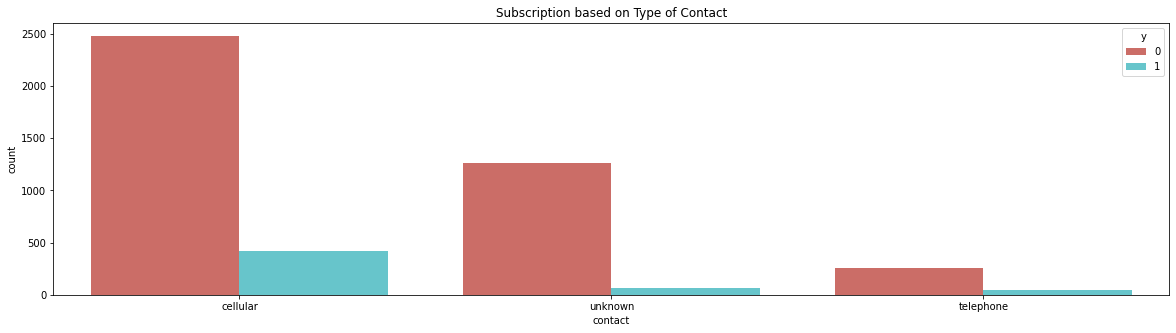

In [20]:
plt.figure(figsize=(20,5))
plt.title("Subscription based on Type of Contact")
sns.countplot(x="contact", data=df, hue="y", palette='hls')
plt.show()

From the chart we could see the subscriber clients mostly come from they who receive the campaign via cellular. It makes sense because nowaday people are way easier to be reached by their cell phone. But there's also a potential subscriber from clients using telephone. Maybe if the marketing team could do more campaign via telephone to reach their client, it won't hurt at all.

### Previous Outcome
This feature is about the outcome of the previous marketing campaign to the client.

In [21]:
CrosstabResult5=pd.crosstab(index=df['poutcome'],columns=df['y'])
CrosstabResult5

y,0,1
poutcome,,
failure,427,63
other,159,38
success,46,83
unknown,3368,337


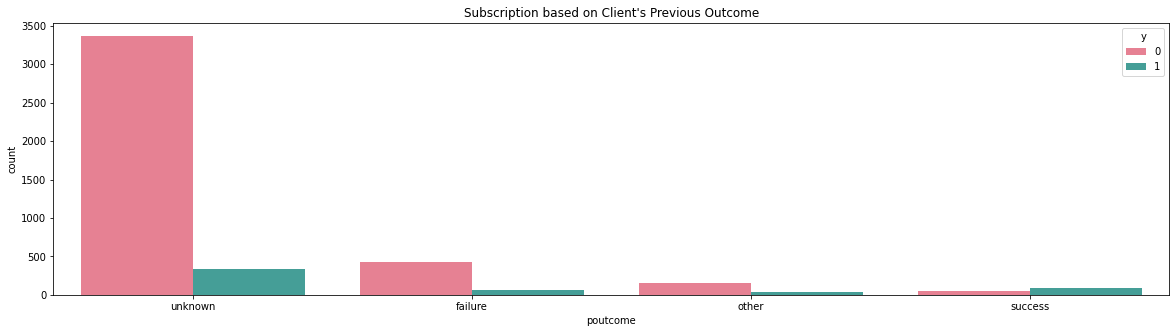

In [22]:
plt.figure(figsize=(20,5))
plt.title("Subscription based on Client's Previous Outcome")
sns.countplot(x="poutcome", data=df,
                   hue="y", palette='husl')
plt.show()

From the chart above we could see even there are many unknown information of the previous outcome, there is a potential for clients with successful previous outcome that seem more interesting in subscribing the current product rather than rejecting it.

### Group of Age
This is the additional feature just to classify the clients based on their age.

In [23]:
df.age.unique()

array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
       26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
       51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
       62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84])

In [24]:
labels = ['age 20-30','age 30-40','age 40-50','age 50-60','age 60-70','age 70-80','age 80-90']
bins = [18, 30, 40, 50, 60, 70, 80, 90]
df['AgeGroup'] = pd.cut(df["age"], bins=bins, labels=labels)

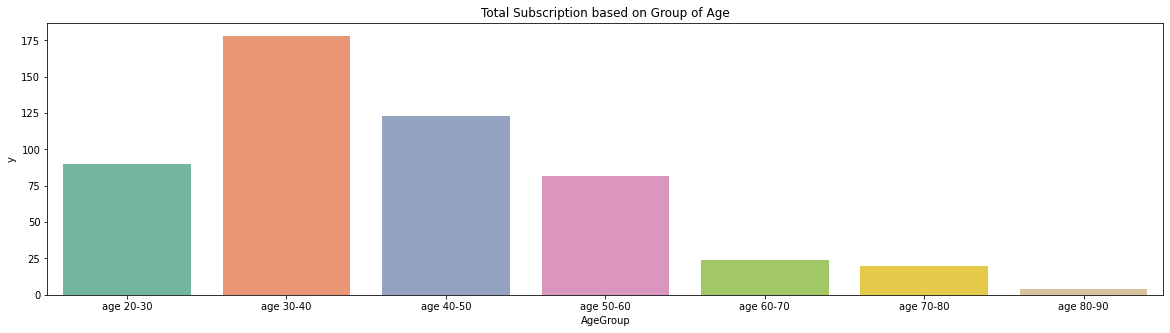

In [25]:
df6 = df.groupby('AgeGroup')[['y']].sum().reset_index()
plt.figure(figsize=(20,5))
plt.title("Total Subscription based on Group of Age")
sns.barplot(data=df6, x='AgeGroup', y='y', palette='Set2')
plt.show()

In [26]:
CrosstabResult6=pd.crosstab(index=df['AgeGroup'],columns=df['y'])
CrosstabResult6

y,0,1
AgeGroup,,
age 20-30,542,90
age 30-40,1622,178
age 40-50,1039,123
age 50-60,718,82
age 60-70,49,24
age 70-80,26,20
age 80-90,4,4


From the chart above we could see clients who subscribe the product are people with age between 30-40.

### Default, Loan and Housing
The last three categorical features are about the client's ownership of loan (default, personal, and housing loan)

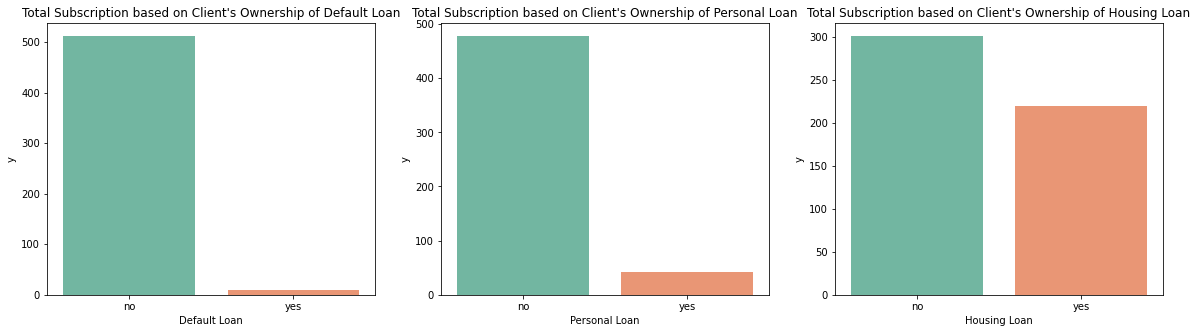

In [27]:
df7 = df.groupby('default')[['y']].sum().reset_index()
df8 = df.groupby('loan')[['y']].sum().reset_index()
df9 = df.groupby('housing')[['y']].sum().reset_index()

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title("Total Subscription based on Client's Ownership of Default Loan")
sns.barplot(data=df7, x='default', y='y', palette='Set2')
plt.xlabel("Default Loan")
plt.subplot(1,3,2)
plt.title("Total Subscription based on Client's Ownership of Personal Loan")
sns.barplot(data=df8, x='loan', y='y', palette='Set2')
plt.xlabel("Personal Loan")
plt.subplot(1,3,3)
plt.title("Total Subscription based on Client's Ownership of Housing Loan")
sns.barplot(data=df9, x='housing', y='y', palette='Set2')
plt.xlabel("Housing Loan")
plt.show()

From the chart above we could see that the client who doesn't have personal loan seem likely to be more interested  to subscribe the current bank's product. However, it's different from the client who has housing loan, they seem equally interested in subscribing as much as client who doesn't have housing loan.

Overall, after looking at each possible features, selecting them to be included in model training would be tricky. However, if we take a look at the whole dataset, all features in them surely have influence to the 'y' value, but not all of them are quite significant. 

This time, we decided to choose mostly from categorical features to be further processed into the training model. This is because for the numerical features themselves, which we should be able to clearly see the measurement value of the correlation itself, none of them shows a significant correlation value. With all those considerations, here are the selected features :
- AgeGroup
- Job
- Education
- poutcome
- default
- loan
- housing

# Data Preprocessing
Now let's prepare the dataset that contains the selected features to be trained by the machine learning models.

In [28]:
# This is for the default random for the whole code
np.random.seed(42)

In [29]:
# Separating the target from the features dataset
y = df['y']
X = df.drop(columns=['y'],axis=1)

## Encode

In [30]:
# Using OneHotEncoder for certain features, and Ordinal Encoder for the features with yes and no value
column_trans = ColumnTransformer([
                ('group_age', OneHotEncoder(dtype='int', sparse=False),['AgeGroup']),
                ('occupation', OneHotEncoder(dtype='int', sparse=False),['job']),
                ('edu', OneHotEncoder(dtype='int', sparse=False),['education']),
                ('pout', OneHotEncoder(dtype='int', sparse=False),['poutcome']),
                ('loandef', OrdinalEncoder(dtype='int'),['default']),
                ('loanl', OrdinalEncoder(dtype='int'),['loan']),
                ('loanh', OrdinalEncoder(dtype='int'),['housing']),
                ],
    remainder='drop'
)

X = column_trans.fit_transform(X)
X

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 1]])

In [31]:
X.shape

(4521, 30)

In [32]:
# Putting in the array into dataframe
X = pd.DataFrame(X, columns = ['age 20-30','age 30-40','age 40-50','age 50-60',
                                                 'age 60-70','age 70-80','age 80-90',
                                                 'job1', 'job2', 'job3', 'job4', 'job5', 'job6',
                                                 'job7', 'job8', 'job9', 'job10', 'job11', 'job12',
                                                 'edu1', 'edu2', 'edu3', 'edu4',
                                                 'out1', 'out2', 'out3', 'out4',
                                                 'default', 'loan', 'housing'
                                                ])
X.head()

,age 20-30,age 30-40,age 40-50,age 50-60,age 60-70,age 70-80,age 80-90,job1,job2,job3,...,edu2,edu3,edu4,out1,out2,out3,out4,default,loan,housing
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,1
4,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


## Data Split
Separating the dataset into 20% of test data and 80% training data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

print("Total data train : ", len(X_train))
print("Total data test  : ", len(X_test))

Total data train :  3616
Total data test  :  905


## Data Scaling

In [34]:
num_pipe = Pipeline([
    ('scaler', StandardScaler())
])

In [35]:
X_train = num_pipe.fit_transform(X_train)
X_test = num_pipe.transform(X_test)

# Model Definition

In this analysis project, we use several machine learning - classifier models to predict the target value.
1. Logistic Regression
2. Support Vector Machine
3. Decision Tree
4. Random Forest Classifier
5. K Nearest Neighbour
6. Naive Bayes (Gaussian and Bernoulli)
7. Gaussian Process Classifier
8. Gradient Boost Classifier

# Model Training
Each model will be trained for the training data. Each model training would be evaluated and resulting the confusion matrix and accuracy score. These result score will be the benchmark of each model to be selected for final model.

In [36]:
# Function for training and shows the evaluation
def train(model, X_train, y_train):
    y_train_pred = model.predict(X_train)
    print("=================================================================================")
    print("TRAINING RESULTS: \n=================================================================================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print("---------------------------------------------------------------------------------")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred)*100:.2f}","%")
    print("---------------------------------------------------------------------------------")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("=================================================================================")
    
    
def evaluate(model,X_test, y_test):
    y_test_pred = model.predict(X_test)
    print("=================================================================================")
    print("TESTING RESULTS: \n=================================================================================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print("---------------------------------------------------------------------------------")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred)*100:.2f}","%")
    print("---------------------------------------------------------------------------------")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("=================================================================================")


## Logistic Regression

In [37]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_score1 = lr.score(X_train, y_train)
lr_predict = lr.predict(X_train)
train(lr, X_train, y_train)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[3157   36]
 [ 357   66]]
---------------------------------------------------------------------------------
ACCURACY SCORE:
89.13 %
---------------------------------------------------------------------------------
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.898406    0.647059  0.891316     0.772733      0.869004
recall        0.988725    0.156028  0.891316     0.572377      0.891316
f1-score      0.941405    0.251429  0.891316     0.596417      0.860691
support    3193.000000  423.000000  0.891316  3616.000000   3616.000000


How to read the confusion matrix result:
- 3157 of subscriber predicted as subscriber
- 66 of not a subscriber predicted as not a subscriber
- 36 of not a subscriber predicted as a subscriber
- 357 of subscriber predicted as not a subscriber

## SVM

In [38]:
svc = SVC(kernel='rbf', C=100)
svc.fit(X_train, y_train)
svc_score1 = svc.score(X_train, y_train)
svc_predict = svc.predict(X_train)
train(svc, X_train, y_train)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[3169   24]
 [ 293  130]]
---------------------------------------------------------------------------------
ACCURACY SCORE:
91.23 %
---------------------------------------------------------------------------------
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.915367    0.844156  0.912334     0.879761      0.907037
recall        0.992484    0.307329  0.912334     0.649906      0.912334
f1-score      0.952367    0.450607  0.912334     0.701487      0.893671
support    3193.000000  423.000000  0.912334  3616.000000   3616.000000


How to read the confusion matrix result:
- 3169 of subscriber predicted as subscriber
- 130 of not a subscriber predicted as not a subscriber
- 24 of not a subscriber predicted as a subscriber
- 293 of subscriber predicted as not a subscriber

## Decision Tree

In [39]:
dt = DecisionTreeClassifier(criterion = 'gini',random_state=42, max_depth = 25)
dt.fit(X_train, y_train)
dt_score1 = dt.score(X_train, y_train)
dt_predict = dt.predict(X_train)
train(dt, X_train, y_train)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[3180   13]
 [ 304  119]]
---------------------------------------------------------------------------------
ACCURACY SCORE:
91.23 %
---------------------------------------------------------------------------------
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.912744    0.901515  0.912334     0.907130      0.911430
recall        0.995929    0.281324  0.912334     0.638626      0.912334
f1-score      0.952524    0.428829  0.912334     0.690676      0.891262
support    3193.000000  423.000000  0.912334  3616.000000   3616.000000


How to read the confusion matrix result:
- 3180 of subscriber predicted as subscriber
- 119 of not a subscriber predicted as not a subscriber
- 13 of not a subscriber predicted as a subscriber
- 304 of subscriber predicted as not a subscriber

## Random Forest

In [40]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_leaf_nodes=100, max_depth=10)
rf.fit(X_train,y_train)
rf_score1 = rf.score(X_train, y_train)
rf_predict = rf.predict(X_train)
train(rf, X_train, y_train)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[3182   11]
 [ 340   83]]
---------------------------------------------------------------------------------
ACCURACY SCORE:
90.29 %
---------------------------------------------------------------------------------
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.903464    0.882979  0.902931     0.893221      0.901068
recall        0.996555    0.196217  0.902931     0.596386      0.902931
f1-score      0.947729    0.321083  0.902931     0.634406      0.874424
support    3193.000000  423.000000  0.902931  3616.000000   3616.000000


How to read the confusion matrix result:
- 3182 of not a subscriber predicted as not a subscriber
- 83 of subscriber predicted as subscriber
- 11 of subscriber predicted as not a subscriber
- 340 of not a subscriber predicted as a subscriber

## KNN

In [41]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_score1 = knn.score(X_train, y_train)
knn_predict = knn.predict(X_train)
train(knn, X_train, y_train)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[3170   23]
 [ 370   53]]
---------------------------------------------------------------------------------
ACCURACY SCORE:
89.13 %
---------------------------------------------------------------------------------
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.895480    0.697368  0.891316     0.796424      0.872305
recall        0.992797    0.125296  0.891316     0.559046      0.891316
f1-score      0.941631    0.212425  0.891316     0.577028      0.856328
support    3193.000000  423.000000  0.891316  3616.000000   3616.000000


How to read the confusion matrix result:
- 3170 of subscriber predicted as subscriber
- 53 of not a subscriber predicted as not a subscriber
- 23 of not a subscriber predicted as a subscriber
- 370 of subscriber predicted as not a subscriber

## Naive Bayes

In [42]:
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
bnb_score1 = bnb.score(X_train, y_train)
bnb_predict = bnb.predict(X_train)
train(bnb, X_train, y_train)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[3108   85]
 [ 322  101]]
---------------------------------------------------------------------------------
ACCURACY SCORE:
88.74 %
---------------------------------------------------------------------------------
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.906122    0.543011  0.887445     0.724567      0.863646
recall        0.973379    0.238771  0.887445     0.606075      0.887445
f1-score      0.938547    0.331691  0.887445     0.635119      0.867557
support    3193.000000  423.000000  0.887445  3616.000000   3616.000000


and so on . . . .

In [43]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_score1 = gnb.score(X_train, y_train)
gnb_predict = gnb.predict(X_train)
train(gnb, X_train, y_train)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[2925  268]
 [ 274  149]]
---------------------------------------------------------------------------------
ACCURACY SCORE:
85.01 %
---------------------------------------------------------------------------------
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.914348    0.357314  0.850111     0.635831      0.849186
recall        0.916066    0.352246  0.850111     0.634156      0.850111
f1-score      0.915207    0.354762  0.850111     0.634984      0.849646
support    3193.000000  423.000000  0.850111  3616.000000   3616.000000


## Gaussian Process Classifier

In [44]:
# ESTIMATED RUNNING TIME = 25 SECONDS
gpc = GaussianProcessClassifier()
gpc.fit(X_train, y_train)
gpc_score1 = gpc.score(X_train, y_train)
gpc_predict = gpc.predict(X_train)
train(gpc, X_train, y_train)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[3171   22]
 [ 295  128]]
---------------------------------------------------------------------------------
ACCURACY SCORE:
91.23 %
---------------------------------------------------------------------------------
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.914887    0.853333  0.912334     0.884110      0.907687
recall        0.993110    0.302600  0.912334     0.647855      0.912334
f1-score      0.952395    0.446771  0.912334     0.699583      0.893247
support    3193.000000  423.000000  0.912334  3616.000000   3616.000000


## Gradient Boosting Classifier

In [45]:
gbc = GradientBoostingClassifier(n_estimators=300, learning_rate=0.7, random_state=42)
gbc.fit(X_train, y_train)
gbc_score1 = gbc.score(X_train, y_train)
gbc_predict = gbc.predict(X_train)
train(gbc, X_train, y_train)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[3171   22]
 [ 299  124]]
---------------------------------------------------------------------------------
ACCURACY SCORE:
91.12 %
---------------------------------------------------------------------------------
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.913833    0.849315  0.911228     0.881574      0.906286
recall        0.993110    0.293144  0.911228     0.643127      0.911228
f1-score      0.951824    0.435852  0.911228     0.693838      0.891465
support    3193.000000  423.000000  0.911228  3616.000000   3616.000000


## ROC Curve
ROC Curve is used to visualize the model evaluation especially the confusion matrix

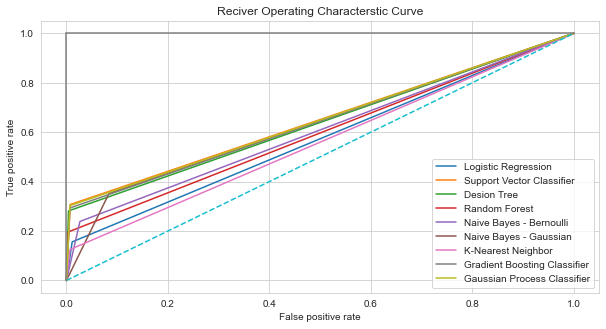

In [46]:
# Saving the confusion matrix result by using the roc_curve function
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_train,lr_predict)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_train,svc_predict)
bnb_false_positive_rate,bnb_true_positive_rate,bnb_threshold = roc_curve(y_train,bnb_predict)
gnb_false_positive_rate,gnb_true_positive_rate,gnb_threshold = roc_curve(y_train,gnb_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_train,rf_predict)                                                             
gbc_false_positive_rate,gbc_true_positive_rate,gbc_threshold = roc_curve(y_train,gbc_predict)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_train,knn_predict)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_train,dt_predict)
gpc_false_positive_rate,gpc_true_positive_rate,gpc_threshold = roc_curve(y_train,gpc_predict)


# Shows the visualization of the ROC Curve from each model
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(bnb_false_positive_rate,bnb_true_positive_rate,label='Naive Bayes - Bernoulli')
plt.plot(gnb_false_positive_rate,gnb_true_positive_rate,label='Naive Bayes - Gaussian')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(gbc_false_positive_rate,gbc_true_positive_rate,label='Gradient Boosting Classifier')
plt.plot(gpc_false_positive_rate,gpc_true_positive_rate,label='Gaussian Process Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

As we all want to get the model predict correctly, we'd want to get as much as true positive and true negative values and zero false positive and false negative. Looking at the graph, we'd want to have our model plotted as far as possible with the blue dashed line. From this first training we have Gaussian Process Classifier and Decision Tree to be the best model in predicting value.

# Cross Validation
All models have been trained and the highest accuracy score is reached by SVM, Decision Tree, and Gaussian Process Classifier. However, this scores are probably reached with overfitting condition. In order to avoid that, we will use the cross validation method to rerun the model training with different structure of data train (based on k-fold value)

In [47]:
# Function to perform cross validation with k fold value = 10
def cross_val(model):
    cvs = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    return cvs

def show_cv(model):
    print("---------------------------------------------------------------------------------")
    print("CROSS VALIDATION SCORES: ")
    print(cross_val(model))
    print("---------------------------------------------------------------------------------")
    print("MEAN : ", cross_val(model).mean())
    print("MAX  : ", cross_val(model).max())
    print("=================================================================================")

### Cross Val - Logistic Regression

In [48]:
print("=================================================================================")
print("MODEL : LOGISTIC REGRESSION \n=================================================================================")
print(" 1st SCORE : ", lr_score1)
show_cv(lr)

MODEL : LOGISTIC REGRESSION 
 1st SCORE :  0.891316371681416
---------------------------------------------------------------------------------
CROSS VALIDATION SCORES: 
[0.89779006 0.89226519 0.90607735 0.8839779  0.89226519 0.86464088
 0.87534626 0.89750693 0.89750693 0.89473684]
---------------------------------------------------------------------------------
MEAN :  0.8902113527494222
MAX  :  0.9060773480662984


### Cross Val - SVM

In [49]:
print("=================================================================================")
print("MODEL : SVM \n=================================================================================")
print(" 1st SCORE : ", svc_score1)
show_cv(svc)

MODEL : SVM 
 1st SCORE :  0.9123340707964602
---------------------------------------------------------------------------------
CROSS VALIDATION SCORES: 
[0.87845304 0.88121547 0.87845304 0.88674033 0.87016575 0.86187845
 0.86149584 0.87257618 0.90027701 0.88088643]
---------------------------------------------------------------------------------
MEAN :  0.8772141534411778
MAX  :  0.9002770083102493


### Cross Val - Decision Tree

In [50]:
print("=================================================================================")
print("MODEL : DECISION TREE \n=================================================================================")
print(" 1st SCORE : ", dt_score1)
show_cv(dt)

MODEL : DECISION TREE 
 1st SCORE :  0.9123340707964602
---------------------------------------------------------------------------------
CROSS VALIDATION SCORES: 
[0.8839779  0.87845304 0.87569061 0.8839779  0.87016575 0.85911602
 0.86703601 0.86980609 0.89196676 0.87534626]
---------------------------------------------------------------------------------
MEAN :  0.8755536340123353
MAX  :  0.8919667590027701


### Cross Val - Random Forest

In [51]:
print("=================================================================================")
print("MODEL : RANDOM FOREST \n=================================================================================")
print(" 1st SCORE : ", rf_score1)
show_cv(rf)

MODEL : RANDOM FOREST 
 1st SCORE :  0.9029314159292036
---------------------------------------------------------------------------------
CROSS VALIDATION SCORES: 
[0.89502762 0.88950276 0.90607735 0.88950276 0.88121547 0.86740331
 0.88642659 0.88365651 0.90027701 0.89750693]
---------------------------------------------------------------------------------
MEAN :  0.8896596317779035
MAX  :  0.9060773480662984


### Cross Val - K Nearest Neighbour

In [52]:
print("=================================================================================")
print("MODEL : K NEAREST NEIGHBOUR \n=================================================================================")
print(" 1st SCORE : ", knn_score1)
show_cv(knn)

MODEL : K NEAREST NEIGHBOUR 
 1st SCORE :  0.891316371681416
---------------------------------------------------------------------------------
CROSS VALIDATION SCORES: 
[0.88674033 0.88950276 0.89779006 0.88674033 0.87845304 0.86464088
 0.87257618 0.88365651 0.90027701 0.89750693]
---------------------------------------------------------------------------------
MEAN :  0.8857884023813531
MAX  :  0.9002770083102493


### Cross Val - Gaussian Naive Bayes

In [53]:
print("=================================================================================")
print("MODEL : NAIVE BAYES - GAUSSIAN \n=================================================================================")
print(" 1st SCORE : ", gnb_score1)
show_cv(gnb)

MODEL : NAIVE BAYES - GAUSSIAN 
 1st SCORE :  0.8501106194690266
---------------------------------------------------------------------------------
CROSS VALIDATION SCORES: 
[0.83425414 0.87016575 0.82872928 0.82596685 0.86464088 0.83701657
 0.84487535 0.83379501 0.83933518 0.87257618]
---------------------------------------------------------------------------------
MEAN :  0.8451355198114507
MAX  :  0.8725761772853186


### Cross Val - Bernoulli Naive Bayes

In [54]:
print("=================================================================================")
print("MODEL : NAIVE BAYES - BERNOULLI \n=================================================================================")
print(" 1st SCORE : ", bnb_score1)
show_cv(bnb)

MODEL : NAIVE BAYES - BERNOULLI 
 1st SCORE :  0.8874446902654868
---------------------------------------------------------------------------------
CROSS VALIDATION SCORES: 
[0.87845304 0.89502762 0.91712707 0.87845304 0.88950276 0.85635359
 0.86980609 0.87534626 0.90304709 0.89750693]
---------------------------------------------------------------------------------
MEAN :  0.8860623498262958
MAX  :  0.9171270718232044


### Cross Val - Gaussian Process Classifier

In [55]:
# WARNING!! ESTIMATED RUNNING TIME : 5 MINS
print("=================================================================================")
print("MODEL : GAUSSIAN PROCESS CLASSIFIER \n=================================================================================")
print(" 1st SCORE : ", gpc_score1)
show_cv(gpc)

MODEL : GAUSSIAN PROCESS CLASSIFIER 
 1st SCORE :  0.9123340707964602
---------------------------------------------------------------------------------
CROSS VALIDATION SCORES: 
[0.88121547 0.88121547 0.8839779  0.88674033 0.86740331 0.85911602
 0.86426593 0.86703601 0.90027701 0.88088643]
---------------------------------------------------------------------------------
MEAN :  0.8772133882248511
MAX  :  0.9002770083102493


### Cross Val - Gradient Boost

In [56]:
print("=================================================================================")
print("MODEL : GRADIENT BOOST CLASSIFIER \n=================================================================================")
print(" 1st SCORE : ", gbc_score1)
show_cv(gbc)

MODEL : GRADIENT BOOST CLASSIFIER 
 1st SCORE :  0.9112278761061947
---------------------------------------------------------------------------------
CROSS VALIDATION SCORES: 
[0.87569061 0.88674033 0.8839779  0.88121547 0.87292818 0.85082873
 0.86980609 0.86703601 0.90027701 0.88365651]
---------------------------------------------------------------------------------
MEAN :  0.8772156838738312
MAX  :  0.9002770083102493


After we do the do the cross valildation, now we have some other accuracy scores from the model training. To summarize, let's just see the visualization in the next part.

## Model Accuracy

In [57]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','SVC','Decision Tree','Random Forest',
                                   'K-Nearest Neighbour', 'Gaussian Naive Bayes', 'Bernoulli Naive Bayes',
                                   'Gaussian Process Classifier','Gradient Boost'], 
                         'Accuracy (%)': [lr_score1*100, svc_score1*100, dt_score1*100, rf_score1*100,
                                          knn_score1*100, gnb_score1*100, bnb_score1*100,
                                          gpc_score1*100, gbc_score1*100
                                         ],
                         'Mean Accuracy(%)': [cross_val(lr).mean()*100, cross_val(svc).mean()*100, 
                                              cross_val(dt).mean()*100, cross_val(rf).mean()*100, 
                                              cross_val(knn).mean()*100, cross_val(gnb).mean()*100,
                                              cross_val(bnb).mean()*100, cross_val(gpc).mean()*100, 
                                              cross_val(gbc).mean()*100
                                              ]
                        })
model_ev

,Model,Accuracy (%),Mean Accuracy(%)
0,Logistic Regression,89.131637,89.021135
1,SVC,91.233407,87.721415
2,Decision Tree,91.233407,87.555363
3,Random Forest,90.293142,88.965963
4,K-Nearest Neighbour,89.131637,88.578840
5,Gaussian Naive Bayes,85.011062,84.513552
6,Bernoulli Naive Bayes,88.744469,88.606235
7,Gaussian Process Classifier,91.233407,87.721339
8,Gradient Boost,91.122788,87.721568


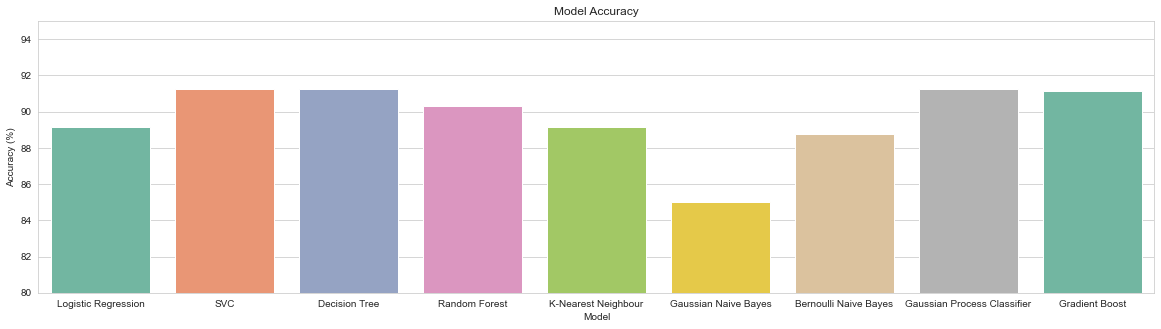

In [58]:
plt.figure(figsize=(20,5))
plt.title('Model Accuracy')
sns.barplot(data=model_ev, x='Model', y='Accuracy (%)', palette='Set2')
plt.ylim(80,95)
plt.show()

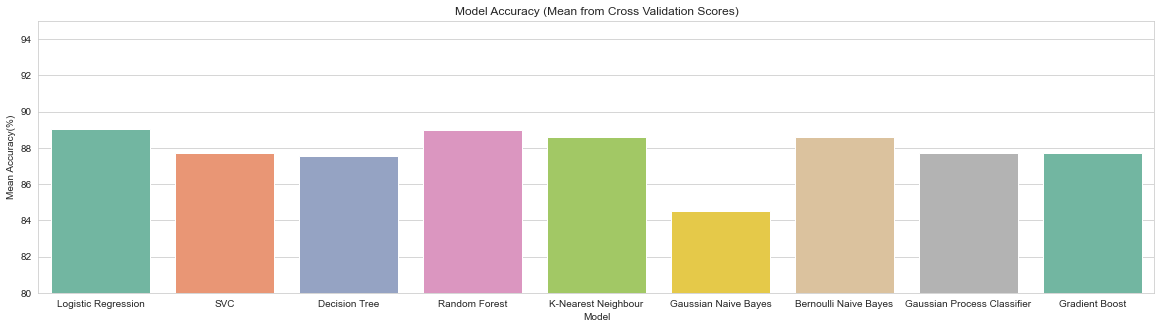

In [59]:
plt.figure(figsize=(20,5))
plt.title('Model Accuracy (Mean from Cross Validation Scores)')
sns.barplot(data=model_ev, x='Model', y='Mean Accuracy(%)', palette='Set2')
plt.ylim(80,95)
plt.show()

After conducting the training model and the cross validation, we decided to choose 2 models with best accuracy score and mean accuracy score. Gaussian Process Classifier actually has the best accuracy score but with it's long running time, it becomes not recommended. So we select the other 2 best model, hich are Decision Tree and Random Forest. These 2 models then will be trained again with different parameter.

## Hyperparameter Tuning with GridSearchCV

### Decision Tree with Hyperparameter Tuning

In [60]:
# ESTIMATED RUNNING TIME = 3 MINS
# Setting the parameter we would like to try
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 40))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

#dt = DecisionTreeClassifier(criterion = 'entropy',random_state=42, max_depth = 21
dt_gs = GridSearchCV(dt, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, return_train_score=True)
dt_gs.fit(X_train, y_train)

Fitting 3 folds for each of 8892 candidates, totalling 26676 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=25, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             return_train_score=True, scoring='accuracy', verbose=1)

In [61]:
best_params_dt = dt_gs.best_params_
print(f"Best parameters: {best_params_dt}")

Best parameters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


The result above is the best parameter for our Decision Tree model, now let's try again to train this model with the best parameter assigned 

In [62]:
dt_new = DecisionTreeClassifier(**best_params_dt)
dt_new.fit(X_train, y_train)
train(dt_new, X_train, y_train)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[3157   36]
 [ 353   70]]
---------------------------------------------------------------------------------
ACCURACY SCORE:
89.24 %
---------------------------------------------------------------------------------
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.899430    0.660377  0.892423     0.779904      0.871466
recall        0.988725    0.165485  0.892423     0.577105      0.892423
f1-score      0.941966    0.264650  0.892423     0.603308      0.862734
support    3193.000000  423.000000  0.892423  3616.000000   3616.000000


In [63]:
dt_gs.best_estimator_

DecisionTreeClassifier(max_depth=1, random_state=42)

### Random Forest with Hyperparameter Tuning

In [64]:
# ESTIMATED RUNNING TIME = 1 MIN
params2 = [{
    'criterion':("gini", "entropy"),
    'n_estimators':[100, 150, 200],  
    'max_leaf_nodes':[100, 120, 150],
    'max_depth':[10,20]},

    {'bootstrap':[False], 
     'n_estimators':[100, 200]}]

rf_gs = GridSearchCV(rf, params2, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, return_train_score=True)
rf_gs.fit(X_train, y_train)

Fitting 3 folds for each of 38 candidates, totalling 114 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=10, max_leaf_nodes=100,
                                              random_state=42),
             n_jobs=-1,
             param_grid=[{'criterion': ('gini', 'entropy'),
                          'max_depth': [10, 20],
                          'max_leaf_nodes': [100, 120, 150],
                          'n_estimators': [100, 150, 200]},
                         {'bootstrap': [False], 'n_estimators': [100, 200]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [65]:
best_params_rf = rf_gs.best_params_
print(f"Best parameters: {best_params_rf}")

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 100, 'n_estimators': 150}


The result above is the best parameter for our Random Forest model, now let's try again to train this model with the best parameter assigned 

In [66]:
rf_new = RandomForestClassifier(**best_params_rf)
rf_new.fit(X_train, y_train)
train(rf_new, X_train, y_train)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[3182   11]
 [ 339   84]]
---------------------------------------------------------------------------------
ACCURACY SCORE:
90.32 %
---------------------------------------------------------------------------------
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.903721    0.884211  0.903208     0.893966      0.901438
recall        0.996555    0.198582  0.903208     0.597568      0.903208
f1-score      0.947870    0.324324  0.903208     0.636097      0.874928
support    3193.000000  423.000000  0.903208  3616.000000   3616.000000


In [67]:
rf_gs.best_estimator_

RandomForestClassifier(max_depth=10, max_leaf_nodes=100, n_estimators=150,
                       random_state=42)

# Evaluation on Test Data

In [68]:
final_model = rf_gs.best_estimator_
final_model.fit(X_test, y_test)
final_predictions = final_model.predict(X_test)
evaluate(final_model, X_test, y_test)

TESTING RESULTS: 
CONFUSION MATRIX:
[[807   0]
 [ 78  20]]
---------------------------------------------------------------------------------
ACCURACY SCORE:
91.38 %
---------------------------------------------------------------------------------
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.911864   1.000000  0.913812    0.955932      0.921408
recall       1.000000   0.204082  0.913812    0.602041      0.913812
f1-score     0.953901   0.338983  0.913812    0.646442      0.887313
support    807.000000  98.000000  0.913812  905.000000    905.000000


In [69]:
diff = pd.DataFrame({'Actual Value':y_test,
                     'Predicted Value' :final_predictions
                    })
diff

,Actual Value,Predicted Value
2398,0,0
800,0,0
2288,0,0
2344,0,0
3615,0,0
...,...,...
3589,1,1
3128,0,0
3259,0,0
4239,0,0


# Model Inference

Now, let's try our model with an example of input dummy data as given below

In [70]:
dummy = [[31, 'management', 'single','secondary', 'no',0, 'yes', 'no',
         'unknown', 3, 'apr', 320, 3, 100,0,'success', 'age 30-40'
         ]]

In [71]:
dum = pd.DataFrame(dummy, columns=['age','job','marital','education','default',
                                   'balance','housing','loan','contact','day',
                                   'month','duration','campaign','pdays','previous','poutcome','AgeGroup'])
dum

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,AgeGroup
0,31,management,single,secondary,no,0,yes,no,unknown,3,apr,320,3,100,0,success,age 30-40


In [72]:
dum = column_trans.transform(dum)

In [73]:
dum = num_pipe.fit_transform(dum)

In [74]:
new_pred = final_model.predict(dum)
if new_pred == [0]:
    print('Prediction : Not a potential client')
else:
    print('Prediction : Potential client!')

Prediction : Not a potential client


From this dummy data, our model predict that this client would not subscribe the bank's product

# Conclusion

1. After we analyze the features, we decided to select these features to be included in model training:
    - AgeGroup
    - Job
    - Education
    - poutcome
    - default
    - loan
    - housing
    
2. We use several models to train the data and we do the cross validation to see them thoroughly to avoid the overfitting condition in the first training. Then we choose **Decision Tree** and **Random Forest Classifier** model to be tested it's parameter so we could get the best parameter from these models to train our data.

3. In the first training, DT reach 91,23% accuracy, but then it's mean of accuracy is 87,5%. So it's true that the it hits the overfitting condition on the first training. After we tune the parameter, DT finally reach 89.24% in accuracy.

4. Meanwhile, for Random Forest, in the first training, RF reach 90,29% accuracy, but then it's mean of accuracy is 88,9%. However, this mean value of accuracy is the best score among the other models. After we tune the parameter, RF finally reach 90,32% in accuracy. This conclude that Random Forest final accuracy score is better than Decision Tree. So, we fit the model to the data test and it reached 91,38% accuracy.

5. For all the time given to us to do this analysis, the results of this model are the best that we can get to predict the intention of a bank client to subscribe the bank term deposit.